In [1]:
from faker import Faker
import pandas as pd
import random
import matplotlib.pyplot as plt
import datetime

In [2]:
df = pd.read_csv('../datasets/nepali_first_name_gender.csv')

In [3]:
filename = '../datasets/lastnames.txt'
with open(filename) as f:
    content = f.readlines()
content = [x.strip()[:-1] for x in content] 

In [4]:
last_names = [x.capitalize() for x in content] 

In [5]:
first_name_male = [x.capitalize() for x in list(df[df.gender=='M'].first_name)] 
first_name_female = [x.capitalize() for x in list(df[df.gender=='F'].first_name)]

In [6]:
[random.choice(first_name_male) + " " + random.choice(last_names) for x in range(10)]

['Pradeep raj nepal Deshemaru',
 'Satish Bhurtel',
 'Bikash Khand',
 'Gagan Bhimrajka',
 'Manish Chaudary',
 'Shamar Bhattarai',
 'Pramod Aduwa',
 'Aashish Sonu',
 'Paulo Dhugel',
 'Glitch Padnay']

In [7]:
total_customer = 600000
male_percent = 58

male = {'name': [random.choice(first_name_male) + " " + random.choice(last_names) for x in range(int(total_customer*male_percent/100))]}
female = {'name': [random.choice(first_name_female) + " " + random.choice(last_names) for x in range(int(total_customer*(100-male_percent)/100))]}

In [8]:
df_male = pd.DataFrame(data=male)
df_male['gender'] = 'Male'
df_female = pd.DataFrame(data=female)
df_female['gender'] = 'Female'

In [9]:
df = df_male.append(df_female)

In [10]:
df.loc[df.sample(frac=.04).index,
    'gender'
] = 'Other'

df.loc[df.sample(frac=.02).index,
    'gender'
] = 'Prefer not to say'

In [11]:
df.gender.value_counts()

Male                 313351
Female               223051
Other                 41736
Prefer not to say     21862
Name: gender, dtype: int64

In [12]:
def email_gen(name):
    name = name.lower()
    return (name.split(' ')[0]+'.'+name.split(' ')[1]+'@fakeemail.com')

In [13]:
df['email'] = df.name.apply(email_gen)

In [14]:
df

,name,gender,email
0,Yash Sob,Male,yash.sob@fakeemail.com
1,Susshanzt Thapamagar,Male,susshanzt.thapamagar@fakeemail.com
2,Dipesh Shfrestha,Male,dipesh.shfrestha@fakeemail.com
3,Czan duwal Haldar,Male,czan.duwal@fakeemail.com
4,Kush Udas,Male,kush.udas@fakeemail.com
...,...,...,...
251995,Liv Guruing,Female,liv.guruing@fakeemail.com
251996,Sneha Sri,Female,sneha.sri@fakeemail.com
251997,Liv Chyhetri,Female,liv.chyhetri@fakeemail.com
251998,Palisha Hussain,Female,palisha.hussain@fakeemail.com


In [15]:
df['phone'] = [random.randint(9841000000, 9842000000) for x in range(df.shape[0])]

In [16]:
df

,name,gender,email,phone
0,Yash Sob,Male,yash.sob@fakeemail.com,9841434445
1,Susshanzt Thapamagar,Male,susshanzt.thapamagar@fakeemail.com,9841188556
2,Dipesh Shfrestha,Male,dipesh.shfrestha@fakeemail.com,9841688854
3,Czan duwal Haldar,Male,czan.duwal@fakeemail.com,9841509313
4,Kush Udas,Male,kush.udas@fakeemail.com,9841148706
...,...,...,...,...
251995,Liv Guruing,Female,liv.guruing@fakeemail.com,9841565396
251996,Sneha Sri,Female,sneha.sri@fakeemail.com,9841301617
251997,Liv Chyhetri,Female,liv.chyhetri@fakeemail.com,9841740858
251998,Palisha Hussain,Female,palisha.hussain@fakeemail.com,9841940952


In [17]:
df['channel'] = 'Word of Mouth'

In [18]:
df.loc[df.sample(frac=.5).index,
    'channel'
] = 'Facebook/Ads'

df.loc[df.sample(frac=.2).index,
    'channel'
] = 'Google Search'

df.loc[df.sample(frac=.1).index,
    'channel'
] = 'Other'

In [19]:
df

,name,gender,email,phone,channel
0,Yash Sob,Male,yash.sob@fakeemail.com,9841434445,Facebook/Ads
1,Susshanzt Thapamagar,Male,susshanzt.thapamagar@fakeemail.com,9841188556,Facebook/Ads
2,Dipesh Shfrestha,Male,dipesh.shfrestha@fakeemail.com,9841688854,Other
3,Czan duwal Haldar,Male,czan.duwal@fakeemail.com,9841509313,Google Search
4,Kush Udas,Male,kush.udas@fakeemail.com,9841148706,Google Search
...,...,...,...,...,...
251995,Liv Guruing,Female,liv.guruing@fakeemail.com,9841565396,Word of Mouth
251996,Sneha Sri,Female,sneha.sri@fakeemail.com,9841301617,Word of Mouth
251997,Liv Chyhetri,Female,liv.chyhetri@fakeemail.com,9841740858,Google Search
251998,Palisha Hussain,Female,palisha.hussain@fakeemail.com,9841940952,Other


In [20]:
df.channel.value_counts()

Facebook/Ads     230391
Google Search    164599
Other            105416
Word of Mouth     99594
Name: channel, dtype: int64

In [21]:
df['first_contact'] = 'app'

In [22]:
df.loc[df.sample(frac=.676).index,
    'first_contact'
] = 'browser'

In [23]:
df

,name,gender,email,phone,channel,first_contact
0,Yash Sob,Male,yash.sob@fakeemail.com,9841434445,Facebook/Ads,browser
1,Susshanzt Thapamagar,Male,susshanzt.thapamagar@fakeemail.com,9841188556,Facebook/Ads,browser
2,Dipesh Shfrestha,Male,dipesh.shfrestha@fakeemail.com,9841688854,Other,browser
3,Czan duwal Haldar,Male,czan.duwal@fakeemail.com,9841509313,Google Search,browser
4,Kush Udas,Male,kush.udas@fakeemail.com,9841148706,Google Search,browser
...,...,...,...,...,...,...
251995,Liv Guruing,Female,liv.guruing@fakeemail.com,9841565396,Word of Mouth,browser
251996,Sneha Sri,Female,sneha.sri@fakeemail.com,9841301617,Word of Mouth,app
251997,Liv Chyhetri,Female,liv.chyhetri@fakeemail.com,9841740858,Google Search,browser
251998,Palisha Hussain,Female,palisha.hussain@fakeemail.com,9841940952,Other,browser


In [24]:
df['first_contact'].value_counts()

browser    515719
app         84281
Name: first_contact, dtype: int64

In [25]:
df = df.sample(frac=1)

In [26]:
df

,name,gender,email,phone,channel,first_contact
285977,Krishna Bhandary,Male,krishna.bhandary@fakeemail.com,9841315767,Word of Mouth,app
131000,Chandra Tamata,Male,chandra.tamata@fakeemail.com,9841880995,Facebook/Ads,browser
35423,Sunita Bhetuwal,Prefer not to say,sunita.bhetuwal@fakeemail.com,9841429617,Google Search,browser
121217,Shubhu Twitwi,Female,shubhu.twitwi@fakeemail.com,9841695679,Google Search,browser
175022,Nikkon Sakha,Male,nikkon.sakha@fakeemail.com,9841625954,Google Search,browser
...,...,...,...,...,...,...
44286,Rohit Palikhee,Male,rohit.palikhee@fakeemail.com,9841872949,Google Search,browser
166216,Riyane Shestha,Female,riyane.shestha@fakeemail.com,9841534119,Word of Mouth,browser
32045,Nikkon Farsal,Male,nikkon.farsal@fakeemail.com,9841271589,Facebook/Ads,browser
192645,Ram Manjhi,Male,ram.manjhi@fakeemail.com,9841005488,Google Search,browser


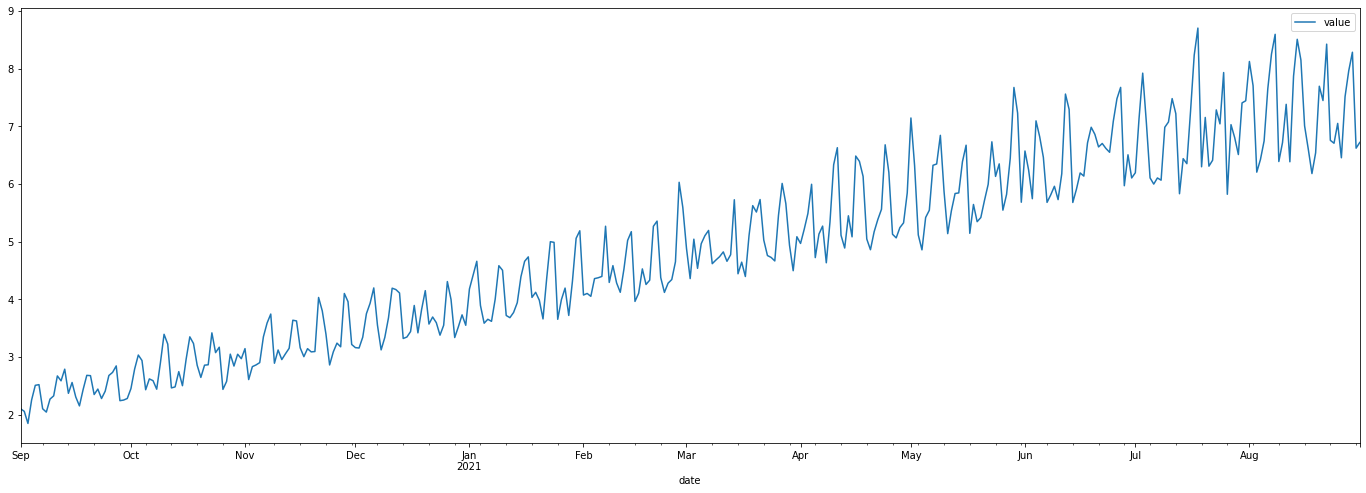

In [27]:
from timeseries_generator import LinearTrend, Generator, WhiteNoise, RandomFeatureFactor, WeekdayFactor
import pandas as pd

start="09-01-2020"
end="08-31-2021"


# setting up a linear tren
lt = LinearTrend(coef=5.0, offset=1., col_name="my_linear_trend")

weekday_factor = WeekdayFactor(
    col_name="weekend_boost_factor",
    factor_values={4: 1.1, 5: 1.2, 6: 1.2}  # Here we assign a factor of 1.1 to Friday, and 1.2 to Sat/Sun 
)

# weekday_factor.plot(start_date=start, end_date=end)

g = Generator(factors={lt, weekday_factor}, features=None, date_range=pd.date_range(start=start, end=end))
g.generate()

# update by adding some white noise to the generator
wn = WhiteNoise(stdev_factor=0.06)
g.update_factor(wn)
g.generate()
g.plot()

In [28]:
data = g.generate()

In [29]:
data['rows'] = (250*data.value).astype(int)

In [30]:
data.rows.sum()

440527

In [31]:
data

,date,base_amount,white_noise,weekend_boost_factor,my_linear_trend,total_factor,value,rows
0,2020-09-01,1.0,0.880106,1.0,2.000000,1.760212,1.760212,440
1,2020-09-02,1.0,0.964833,1.0,2.013699,1.942884,1.942884,485
2,2020-09-03,1.0,1.009437,1.0,2.027397,2.046531,2.046531,511
3,2020-09-04,1.0,0.997857,1.1,2.041096,2.240393,2.240393,560
4,2020-09-05,1.0,0.965628,1.2,2.054795,2.381000,2.381000,595
...,...,...,...,...,...,...,...,...
360,2021-08-27,1.0,0.776356,1.1,6.931507,5.919447,5.919447,1479
361,2021-08-28,1.0,1.078801,1.2,6.945205,8.990990,8.990990,2247
362,2021-08-29,1.0,0.999665,1.2,6.958904,8.347887,8.347887,2086
363,2021-08-30,1.0,0.968477,1.0,6.972603,6.752803,6.752803,1688


In [32]:
def nepali_holiday(row):
    date = datetime.datetime.strptime(str(row.date), "%Y-%m-%d %H:%M:%S")
    num = row.rows
    if date>datetime.datetime(2020, 10, 16) and date<datetime.datetime(2020, 10, 25):
        num = num + 2000
    if date>datetime.datetime(2020, 12, 24) and date<datetime.datetime(2021, 1, 2):
        num = num + 100
    if date>datetime.datetime(2021, 1, 4) and date<datetime.datetime(2021, 1, 7):
        num = num - num
    if date>datetime.datetime(2021, 2, 13) and date<datetime.datetime(2021, 2, 15):
        num = num + 100
    if date>datetime.datetime(2021, 7, 1):
        num = int(num * 2)
    return num

In [33]:
data['rows'] = data.apply(nepali_holiday, axis=1)

In [34]:
# ["2020-09-01"]*100 + ["2020-09-02"] * 200
from datetime import datetime as dt
import datetime

def create_list(row):
    return [str(row.date)]*row.rows

In [35]:
final_dates = (data.apply(create_list, axis=1).sum())

In [36]:
clients = df.head(len(final_dates))
clients.reset_index(inplace = True, drop=True)

In [37]:
clients['created_at'] = final_dates

/var/folders/zy/d9m3l1wn4pjf2b_1ny6w5ftc0000gp/T/ipykernel_69728/801896566.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clients['created_at'] = final_dates


In [38]:
clients

,name,gender,email,phone,channel,first_contact,created_at
0,Krishna Bhandary,Male,krishna.bhandary@fakeemail.com,9841315767,Word of Mouth,app,2020-09-01 00:00:00
1,Chandra Tamata,Male,chandra.tamata@fakeemail.com,9841880995,Facebook/Ads,browser,2020-09-01 00:00:00
2,Sunita Bhetuwal,Prefer not to say,sunita.bhetuwal@fakeemail.com,9841429617,Google Search,browser,2020-09-01 00:00:00
3,Shubhu Twitwi,Female,shubhu.twitwi@fakeemail.com,9841695679,Google Search,browser,2020-09-01 00:00:00
4,Nikkon Sakha,Male,nikkon.sakha@fakeemail.com,9841625954,Google Search,browser,2020-09-01 00:00:00
...,...,...,...,...,...,...,...
561871,Anjan Sawa,Male,anjan.sawa@fakeemail.com,9841655186,Facebook/Ads,browser,2021-08-31 00:00:00
561872,Aakash Banmali,Male,aakash.banmali@fakeemail.com,9841124188,Other,browser,2021-08-31 00:00:00
561873,Nisu Dhungan,Female,nisu.dhungan@fakeemail.com,9841716163,Facebook/Ads,app,2021-08-31 00:00:00
561874,Lune Adhikaari,Female,lune.adhikaari@fakeemail.com,9841248719,Facebook/Ads,browser,2021-08-31 00:00:00


In [39]:
clients.gender.value_counts()

Male                 293429
Female               208845
Other                 39165
Prefer not to say     20437
Name: gender, dtype: int64

In [40]:
clients.channel.value_counts()

Facebook/Ads     215641
Google Search    154201
Other             98770
Word of Mouth     93264
Name: channel, dtype: int64

In [41]:
clients['first_contact'].value_counts()

browser    483092
app         78784
Name: first_contact, dtype: int64

In [42]:
def random_times(input_time):
    random_hour = random.uniform(0, 23)
    return dt.strptime(input_time, "%Y-%m-%d %H:%M:%S") + datetime.timedelta(hours=random_hour)

In [43]:
clients['created_at'] = clients['created_at'].apply(random_times)

/var/folders/zy/d9m3l1wn4pjf2b_1ny6w5ftc0000gp/T/ipykernel_69728/1294208807.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clients['created_at'] = clients['created_at'].apply(random_times)


In [44]:
clients['client_id'] = clients.index + 100000000

/var/folders/zy/d9m3l1wn4pjf2b_1ny6w5ftc0000gp/T/ipykernel_69728/781864625.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clients['client_id'] = clients.index + 100000000


In [45]:
clients

,name,gender,email,phone,channel,first_contact,created_at,client_id
0,Krishna Bhandary,Male,krishna.bhandary@fakeemail.com,9841315767,Word of Mouth,app,2020-09-01 03:55:29.289668,100000000
1,Chandra Tamata,Male,chandra.tamata@fakeemail.com,9841880995,Facebook/Ads,browser,2020-09-01 20:24:59.075054,100000001
2,Sunita Bhetuwal,Prefer not to say,sunita.bhetuwal@fakeemail.com,9841429617,Google Search,browser,2020-09-01 06:11:40.903705,100000002
3,Shubhu Twitwi,Female,shubhu.twitwi@fakeemail.com,9841695679,Google Search,browser,2020-09-01 13:47:49.286772,100000003
4,Nikkon Sakha,Male,nikkon.sakha@fakeemail.com,9841625954,Google Search,browser,2020-09-01 16:21:23.227790,100000004
...,...,...,...,...,...,...,...,...
561871,Anjan Sawa,Male,anjan.sawa@fakeemail.com,9841655186,Facebook/Ads,browser,2021-08-31 15:32:30.379858,100561871
561872,Aakash Banmali,Male,aakash.banmali@fakeemail.com,9841124188,Other,browser,2021-08-31 07:42:41.074620,100561872
561873,Nisu Dhungan,Female,nisu.dhungan@fakeemail.com,9841716163,Facebook/Ads,app,2021-08-31 13:25:51.409598,100561873
561874,Lune Adhikaari,Female,lune.adhikaari@fakeemail.com,9841248719,Facebook/Ads,browser,2021-08-31 22:55:38.269442,100561874


In [46]:
def date_gen(start, end):
    start_date = datetime.date(start, 1, 1)
    end_date = datetime.date(end, 12, 31)
    time_between_dates = end_date - start_date
    days_between_dates = time_between_dates.days
    random_number_of_days = random.randrange(days_between_dates)
    random_date = start_date + datetime.timedelta(days=random_number_of_days)
    return str(random_date)

In [47]:
dob = [date_gen(1975, 1990) for x in range(clients.shape[0]//5)] + \
[date_gen(1991, 1995) for x in range(clients.shape[0]//5)] + \
[date_gen(1996, 2000) for x in range(clients.shape[0]//2)] + \
[date_gen(2001, 2005) for x in range(clients.shape[0]//2)] + \
[date_gen(2006, 2008) for x in range(clients.shape[0]//5)]

In [48]:
random.shuffle(dob)

In [49]:
clients['dob'] = dob[:clients.shape[0]]

/var/folders/zy/d9m3l1wn4pjf2b_1ny6w5ftc0000gp/T/ipykernel_69728/1825158366.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clients['dob'] = dob[:clients.shape[0]]


In [50]:
clients

,name,gender,email,phone,channel,first_contact,created_at,client_id,dob
0,Krishna Bhandary,Male,krishna.bhandary@fakeemail.com,9841315767,Word of Mouth,app,2020-09-01 03:55:29.289668,100000000,1999-07-01
1,Chandra Tamata,Male,chandra.tamata@fakeemail.com,9841880995,Facebook/Ads,browser,2020-09-01 20:24:59.075054,100000001,2008-06-06
2,Sunita Bhetuwal,Prefer not to say,sunita.bhetuwal@fakeemail.com,9841429617,Google Search,browser,2020-09-01 06:11:40.903705,100000002,2002-06-14
3,Shubhu Twitwi,Female,shubhu.twitwi@fakeemail.com,9841695679,Google Search,browser,2020-09-01 13:47:49.286772,100000003,2005-02-14
4,Nikkon Sakha,Male,nikkon.sakha@fakeemail.com,9841625954,Google Search,browser,2020-09-01 16:21:23.227790,100000004,1983-06-26
...,...,...,...,...,...,...,...,...,...
561871,Anjan Sawa,Male,anjan.sawa@fakeemail.com,9841655186,Facebook/Ads,browser,2021-08-31 15:32:30.379858,100561871,2000-09-15
561872,Aakash Banmali,Male,aakash.banmali@fakeemail.com,9841124188,Other,browser,2021-08-31 07:42:41.074620,100561872,2002-04-04
561873,Nisu Dhungan,Female,nisu.dhungan@fakeemail.com,9841716163,Facebook/Ads,app,2021-08-31 13:25:51.409598,100561873,1992-01-26
561874,Lune Adhikaari,Female,lune.adhikaari@fakeemail.com,9841248719,Facebook/Ads,browser,2021-08-31 22:55:38.269442,100561874,1997-03-17


In [51]:
clients

,name,gender,email,phone,channel,first_contact,created_at,client_id,dob
0,Krishna Bhandary,Male,krishna.bhandary@fakeemail.com,9841315767,Word of Mouth,app,2020-09-01 03:55:29.289668,100000000,1999-07-01
1,Chandra Tamata,Male,chandra.tamata@fakeemail.com,9841880995,Facebook/Ads,browser,2020-09-01 20:24:59.075054,100000001,2008-06-06
2,Sunita Bhetuwal,Prefer not to say,sunita.bhetuwal@fakeemail.com,9841429617,Google Search,browser,2020-09-01 06:11:40.903705,100000002,2002-06-14
3,Shubhu Twitwi,Female,shubhu.twitwi@fakeemail.com,9841695679,Google Search,browser,2020-09-01 13:47:49.286772,100000003,2005-02-14
4,Nikkon Sakha,Male,nikkon.sakha@fakeemail.com,9841625954,Google Search,browser,2020-09-01 16:21:23.227790,100000004,1983-06-26
...,...,...,...,...,...,...,...,...,...
561871,Anjan Sawa,Male,anjan.sawa@fakeemail.com,9841655186,Facebook/Ads,browser,2021-08-31 15:32:30.379858,100561871,2000-09-15
561872,Aakash Banmali,Male,aakash.banmali@fakeemail.com,9841124188,Other,browser,2021-08-31 07:42:41.074620,100561872,2002-04-04
561873,Nisu Dhungan,Female,nisu.dhungan@fakeemail.com,9841716163,Facebook/Ads,app,2021-08-31 13:25:51.409598,100561873,1992-01-26
561874,Lune Adhikaari,Female,lune.adhikaari@fakeemail.com,9841248719,Facebook/Ads,browser,2021-08-31 22:55:38.269442,100561874,1997-03-17


In [52]:
location = pd.read_csv("../datasets/location.csv")

In [53]:
location = location[['lat', 'lon', 'name']]

In [54]:
location_list =  [location.sample().values.tolist() for x in range(clients.shape[0])]

In [55]:
location_df = pd.DataFrame(location_list)

In [56]:
location_df

,0
0,"[27.7182, 85.319, Metro Park]"
1,"[27.6879, 85.331, Shram Marg]"
2,"[27.683, 85.3112, Jhamsikhel Rd]"
3,"[27.7083, 85.2885, Mountview kiddie school]"
4,"[27.7177, 85.328, Gairidhara Rd]"
...,...
561871,"[27.7538, 85.3509, Mountain Monarch Adventures]"
561872,"[27.7198, 85.3379, Dhanawantari Marg]"
561873,"[27.7131, 85.3246, Bhagawati Marg]"
561874,"[27.6717, 85.3192, Lagankhel Satdobato Rd]"


In [57]:
location_df[['lat','lon', 'location_name']] = pd.DataFrame(location_df[0].tolist(), index= location_df.index)

In [58]:
location_df[['lat', 'lon', 'location_name']]

,lat,lon,location_name
0,27.7182,85.3190,Metro Park
1,27.6879,85.3310,Shram Marg
2,27.6830,85.3112,Jhamsikhel Rd
3,27.7083,85.2885,Mountview kiddie school
4,27.7177,85.3280,Gairidhara Rd
...,...,...,...
561871,27.7538,85.3509,Mountain Monarch Adventures
561872,27.7198,85.3379,Dhanawantari Marg
561873,27.7131,85.3246,Bhagawati Marg
561874,27.6717,85.3192,Lagankhel Satdobato Rd


In [59]:
clients

,name,gender,email,phone,channel,first_contact,created_at,client_id,dob
0,Krishna Bhandary,Male,krishna.bhandary@fakeemail.com,9841315767,Word of Mouth,app,2020-09-01 03:55:29.289668,100000000,1999-07-01
1,Chandra Tamata,Male,chandra.tamata@fakeemail.com,9841880995,Facebook/Ads,browser,2020-09-01 20:24:59.075054,100000001,2008-06-06
2,Sunita Bhetuwal,Prefer not to say,sunita.bhetuwal@fakeemail.com,9841429617,Google Search,browser,2020-09-01 06:11:40.903705,100000002,2002-06-14
3,Shubhu Twitwi,Female,shubhu.twitwi@fakeemail.com,9841695679,Google Search,browser,2020-09-01 13:47:49.286772,100000003,2005-02-14
4,Nikkon Sakha,Male,nikkon.sakha@fakeemail.com,9841625954,Google Search,browser,2020-09-01 16:21:23.227790,100000004,1983-06-26
...,...,...,...,...,...,...,...,...,...
561871,Anjan Sawa,Male,anjan.sawa@fakeemail.com,9841655186,Facebook/Ads,browser,2021-08-31 15:32:30.379858,100561871,2000-09-15
561872,Aakash Banmali,Male,aakash.banmali@fakeemail.com,9841124188,Other,browser,2021-08-31 07:42:41.074620,100561872,2002-04-04
561873,Nisu Dhungan,Female,nisu.dhungan@fakeemail.com,9841716163,Facebook/Ads,app,2021-08-31 13:25:51.409598,100561873,1992-01-26
561874,Lune Adhikaari,Female,lune.adhikaari@fakeemail.com,9841248719,Facebook/Ads,browser,2021-08-31 22:55:38.269442,100561874,1997-03-17


In [60]:
clients = pd.concat([clients, location_df[['lat', 'lon', 'location_name']]], axis=1)

In [61]:
list(clients)

['name',
 'gender',
 'email',
 'phone',
 'channel',
 'first_contact',
 'created_at',
 'client_id',
 'dob',
 'lat',
 'lon',
 'location_name']

In [65]:
clients[
['client_id',
 'name',
 'gender',
 'dob',
 'email',
 'phone',
 'channel',
 'first_contact',
 'created_at']
].to_csv('../datasets/clients.csv', index=False)